6410422020_Suphanun Sukamta, Rank#12 Team name: TXT

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dads6003-in-class-competition/sampleSubmission.csv
/kaggle/input/dads6003-in-class-competition/train.csv
/kaggle/input/dads6003-in-class-competition/test.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv('/kaggle/input/dads6003-in-class-competition/train.csv')
df_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,-10.731014,-166.447703,57.634618,5.851483,6.443051,773.535357,-425.516507,19.541551,102333.24180,37.515512,...,1.177903,4531.019914,65.320993,10.856422,42.317769,215.727832,9.922942,194.151039,-4.580311,0
1,-11.357862,-175.583196,61.413742,4.957525,6.022880,592.665369,-154.993322,17.165756,56410.00878,33.667832,...,6.288225,5745.900235,124.629610,19.519498,37.481917,193.590955,10.280823,159.152326,-4.361565,0
2,-19.008191,-266.301983,43.228042,5.173549,5.569678,912.741203,-337.001477,18.362978,37204.35472,24.194495,...,5.241047,5369.285274,136.536890,16.824492,31.761223,195.816664,9.604161,148.690528,-5.322491,1
3,-16.849847,-228.458742,45.440429,6.267129,4.125443,834.109486,-297.096954,16.375756,54967.23130,20.578061,...,2.316119,NaN,118.295834,19.972844,51.722932,210.446677,8.108592,310.539447,-5.205344,0
4,-11.518749,-345.861627,37.470283,6.178874,5.527774,634.255353,-243.072126,16.785630,62397.51981,39.815572,...,5.366404,6161.928292,61.414626,15.990853,51.659323,203.356424,12.552922,241.868249,-4.889072,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7391 non-null   float64
 1   x2      7466 non-null   float64
 2   x3      7444 non-null   float64
 3   x4      7407 non-null   float64
 4   x5      7440 non-null   float64
 5   x6      7382 non-null   float64
 6   x7      7419 non-null   float64
 7   x8      7365 non-null   float64
 8   x9      7500 non-null   float64
 9   x10     7421 non-null   float64
 10  x11     7483 non-null   float64
 11  x12     7488 non-null   float64
 12  x13     7370 non-null   float64
 13  x14     7376 non-null   float64
 14  x15     7393 non-null   float64
 15  x16     7407 non-null   float64
 16  x17     7375 non-null   float64
 17  x18     7480 non-null   float64
 18  x19     7355 non-null   float64
 19  x20     7374 non-null   float64
 20  y       7500 non-null   int64  
dtypes: float64(20), int64(1)
memory usage

array([[<AxesSubplot:title={'center':'x20'}>]], dtype=object)

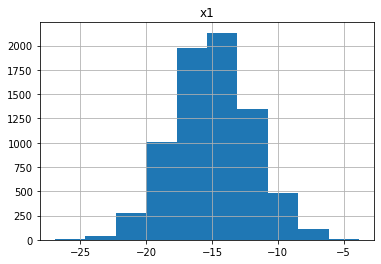

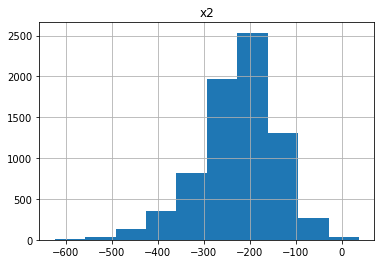

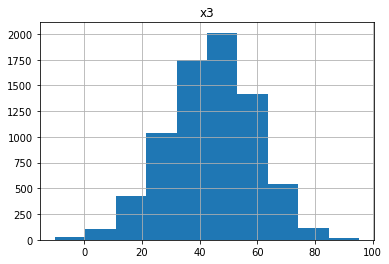

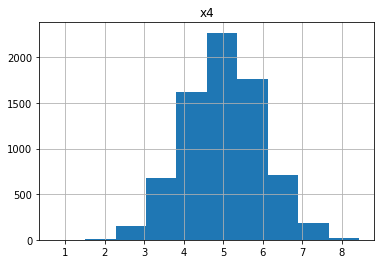

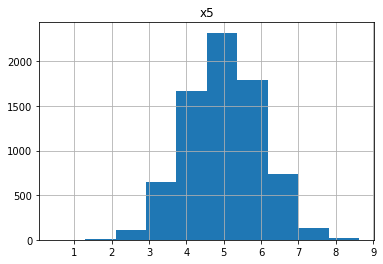

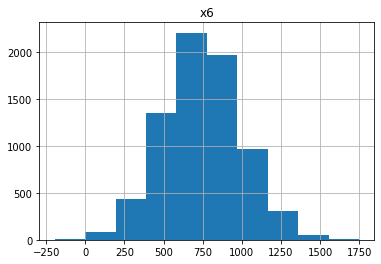

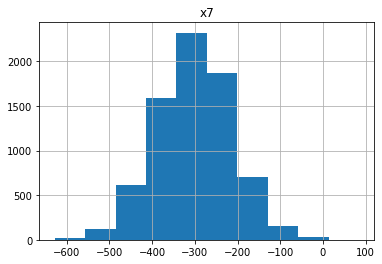

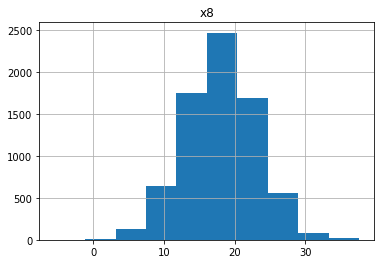

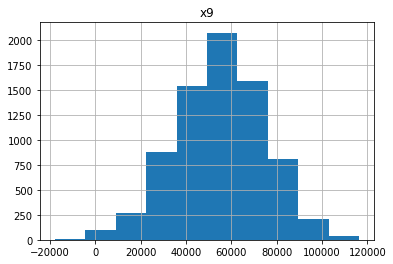

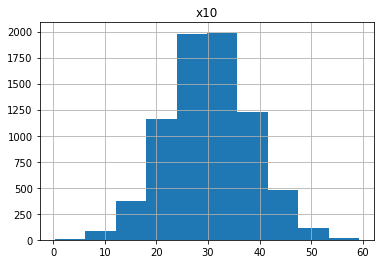

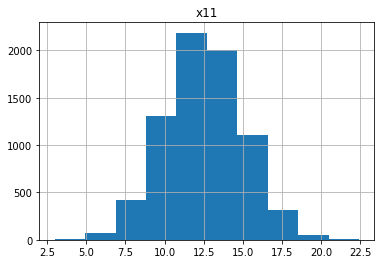

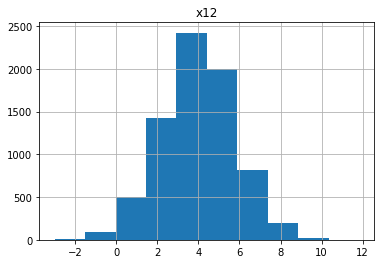

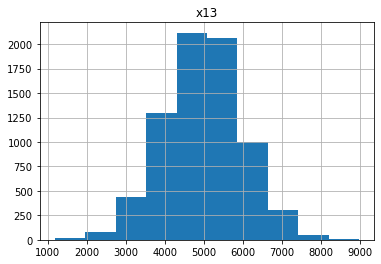

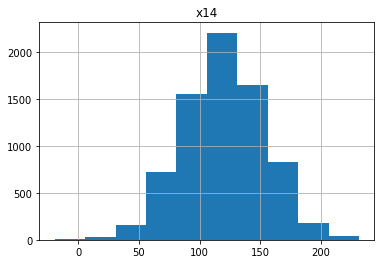

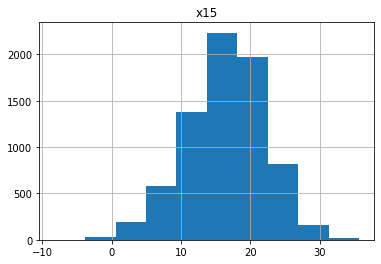

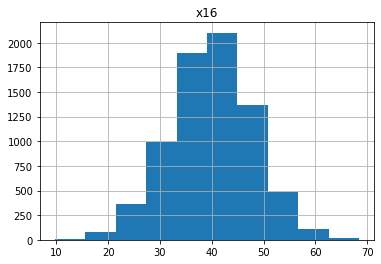

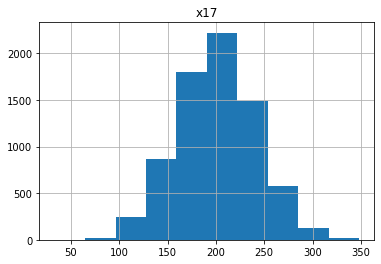

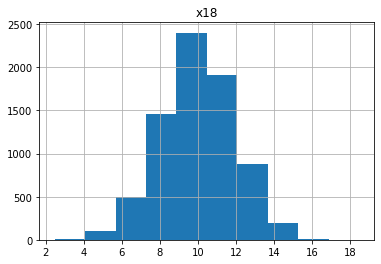

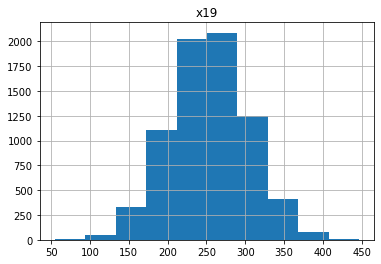

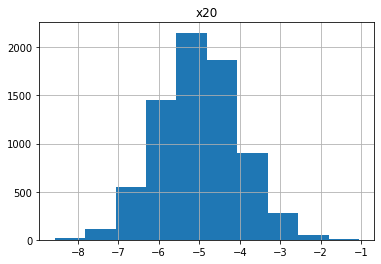

In [5]:
import matplotlib.pyplot as plt
import numpy as np

df_train.hist(column='x1')
df_train.hist(column='x2')
df_train.hist(column='x3')
df_train.hist(column='x4')
df_train.hist(column='x5')
df_train.hist(column='x6')
df_train.hist(column='x7')
df_train.hist(column='x8')
df_train.hist(column='x9')
df_train.hist(column='x10')
df_train.hist(column='x11')
df_train.hist(column='x12')
df_train.hist(column='x13')
df_train.hist(column='x14')
df_train.hist(column='x15')
df_train.hist(column='x16')
df_train.hist(column='x17')
df_train.hist(column='x18')
df_train.hist(column='x19')
df_train.hist(column='x20')

In [6]:
count_nan = df_train[['x'+str(i) for i in range(1,21)]].isnull().sum()
print('Feature  Nan\n',count_nan)

Feature  Nan
 x1     109
x2      34
x3      56
x4      93
x5      60
x6     118
x7      81
x8     135
x9       0
x10     79
x11     17
x12     12
x13    130
x14    124
x15    107
x16     93
x17    125
x18     20
x19    145
x20    126
dtype: int64


In [7]:
train = df_train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5985 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5985 non-null   float64
 1   x2      5985 non-null   float64
 2   x3      5985 non-null   float64
 3   x4      5985 non-null   float64
 4   x5      5985 non-null   float64
 5   x6      5985 non-null   float64
 6   x7      5985 non-null   float64
 7   x8      5985 non-null   float64
 8   x9      5985 non-null   float64
 9   x10     5985 non-null   float64
 10  x11     5985 non-null   float64
 11  x12     5985 non-null   float64
 12  x13     5985 non-null   float64
 13  x14     5985 non-null   float64
 14  x15     5985 non-null   float64
 15  x16     5985 non-null   float64
 16  x17     5985 non-null   float64
 17  x18     5985 non-null   float64
 18  x19     5985 non-null   float64
 19  x20     5985 non-null   float64
 20  y       5985 non-null   int64  
dtypes: float64(20), int64(1)
memory usage

In [8]:
count_nan = train[['x'+str(i) for i in range(1,21)]].isnull().sum()
print('Feature  Nan\n',count_nan)

Feature  Nan
 x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
dtype: int64


In [9]:
df_test = pd.read_csv('/kaggle/input/dads6003-in-class-competition/test.csv')
df_test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,-14.880285,-413.657030,17.037929,5.627481,6.262187,704.164878,-269.815659,13.503896,60805.03782,31.065906,5.625478,5.150013,6282.637653,174.281276,19.959450,32.278906,206.323118,8.337124,232.140628,-5.120450
1,-13.987087,-235.197680,53.670585,4.743702,4.670301,1226.941573,-184.656449,7.034055,55445.68723,15.189238,15.746002,3.880180,3759.028105,32.216142,17.054081,35.934156,191.790254,10.985527,267.024627,-5.200961
2,-11.764850,-192.880170,38.687566,5.606648,4.147060,940.690132,-182.564985,17.218596,31562.61815,34.769586,12.766144,4.885215,6722.719526,181.736690,20.479688,33.809666,166.718488,7.087623,115.762593,-6.080712
3,-10.790193,-204.849932,50.837951,5.934410,5.310772,794.581702,-245.911853,9.936746,47299.76010,25.565751,14.068207,7.156563,5651.188202,127.570137,20.904829,49.857911,139.872041,9.597151,213.574163,-6.355565
4,-17.113392,-141.457819,53.246627,5.939751,5.631022,543.441438,-302.081360,21.861266,66725.53006,34.796947,13.834198,4.743589,5376.558510,119.269139,19.826086,39.903060,311.541001,12.573611,263.709173,-4.329967


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2500 non-null   float64
 1   x2      2500 non-null   float64
 2   x3      2500 non-null   float64
 3   x4      2500 non-null   float64
 4   x5      2500 non-null   float64
 5   x6      2500 non-null   float64
 6   x7      2500 non-null   float64
 7   x8      2500 non-null   float64
 8   x9      2500 non-null   float64
 9   x10     2500 non-null   float64
 10  x11     2500 non-null   float64
 11  x12     2500 non-null   float64
 12  x13     2500 non-null   float64
 13  x14     2500 non-null   float64
 14  x15     2500 non-null   float64
 15  x16     2500 non-null   float64
 16  x17     2500 non-null   float64
 17  x18     2500 non-null   float64
 18  x19     2500 non-null   float64
 19  x20     2500 non-null   float64
dtypes: float64(20)
memory usage: 390.8 KB


In [11]:
count_nan_test = df_test[['x'+str(i) for i in range(1,21)]].isnull().sum()
print('Feature  NaN',count_nan_test)

Feature  NaN x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler

scaled_features = train.copy()
col_names = ['x'+str(i) for i in range(1,21)]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)


scaled_features[col_names] = features
scaled_features.head()

#Normalize

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,1.421080,0.693875,0.905046,0.857595,1.445430,0.110570,-1.404288,0.290635,2.422297,0.899619,...,-1.572066,-0.451651,-1.636288,-0.985627,0.300578,0.363244,-0.031862,-1.179933,0.442582,0
1,1.210338,0.586143,1.154253,-0.051377,1.025267,-0.616569,1.666149,-0.183265,0.078349,0.422666,...,1.279989,0.767996,0.134102,0.551891,-0.307939,-0.180570,0.151627,-1.874197,0.664238,0
2,-1.361650,-0.483681,-0.044967,0.168275,0.572073,0.670209,-0.399643,0.055545,-0.901919,-0.751635,...,0.695562,0.389903,0.489540,0.073583,-1.027800,-0.125893,-0.195304,-2.081726,-0.309474,1
4,1.156248,-1.421908,-0.424651,1.190484,0.530169,-0.449368,0.666455,-0.259089,0.383955,1.184731,...,0.765524,1.185656,-1.752895,-0.074371,1.476068,0.059328,1.316550,-0.233375,0.129713,1
5,1.674116,0.086464,-0.113227,-0.297359,-0.388915,-0.430375,-1.894802,0.006669,1.242844,-0.698647,...,-0.194710,1.632567,-1.315471,-0.416705,1.706256,0.451350,0.166036,-1.416974,-0.966077,0


In [13]:
scaled_features.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
count,5.985000e+03,5.985000e+03,5.985000e+03,5.985000e+03,5.985000e+03,5.985000e+03,5.985000e+03,5.985000e+03,5.985000e+03,5.985000e+03,...,5.985000e+03,5.985000e+03,5.985000e+03,5.985000e+03,5.985000e+03,5.985000e+03,5.985000e+03,5.985000e+03,5.985000e+03,5985.000000
mean,-5.742367e-16,1.943679e-16,-6.333002e-17,3.585733e-17,7.598674e-16,-1.557234e-16,-1.155300e-16,-1.924016e-16,-8.291891e-18,5.143059e-16,...,1.938369e-17,2.815997e-16,2.043803e-16,-3.944213e-18,-1.037321e-16,-4.279776e-16,9.982268e-17,5.804788e-17,-3.898487e-16,0.256307
std,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,...,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,0.436630
min,-3.719408e+00,-4.709628e+00,-3.572623e+00,-4.344421e+00,-4.520008e+00,-3.734089e+00,-3.707501e+00,-4.690081e+00,-3.710898e+00,-3.709656e+00,...,-3.905450e+00,-3.811593e+00,-4.169682e+00,-4.365233e+00,-3.470318e+00,-4.121832e+00,-3.857231e+00,-3.944363e+00,-3.598973e+00,0.000000
25%,-6.705409e-01,-5.360433e-01,-6.649470e-01,-6.769608e-01,-6.775765e-01,-6.764023e-01,-6.668268e-01,-6.714104e-01,-6.552378e-01,-6.707274e-01,...,-6.654406e-01,-6.763565e-01,-6.851537e-01,-6.214709e-01,-6.754955e-01,-6.722963e-01,-6.608086e-01,-6.761478e-01,-6.792129e-01,0.000000
50%,6.721238e-03,1.068052e-01,3.934251e-02,1.397196e-02,6.682105e-03,-1.343814e-02,2.374764e-02,1.228822e-02,3.071133e-02,-1.722309e-02,...,1.407769e-02,1.080771e-02,3.016516e-03,5.074375e-02,1.526136e-02,6.694128e-03,-9.213903e-03,-1.045291e-02,-6.625789e-04,0.000000
75%,6.755434e-01,6.794420e-01,6.855006e-01,6.783668e-01,6.791926e-01,6.582180e-01,6.761320e-01,6.662181e-01,6.869323e-01,6.678468e-01,...,6.578865e-01,6.665341e-01,6.756587e-01,6.962924e-01,6.833498e-01,6.651710e-01,6.739365e-01,6.838168e-01,6.596517e-01,1.000000
max,3.741354e+00,3.099488e+00,3.389946e+00,3.488627e+00,3.625663e+00,3.510319e+00,4.386530e+00,3.893364e+00,3.138461e+00,3.396369e+00,...,4.369570e+00,4.007184e+00,3.326501e+00,3.409975e+00,3.587491e+00,3.615707e+00,4.353964e+00,3.831172e+00,3.344608e+00,1.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


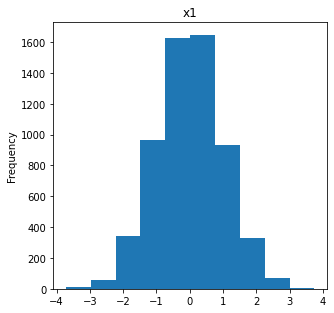

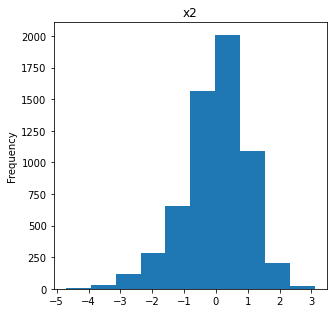

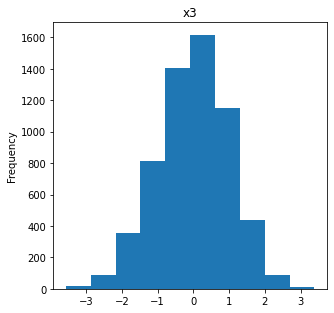

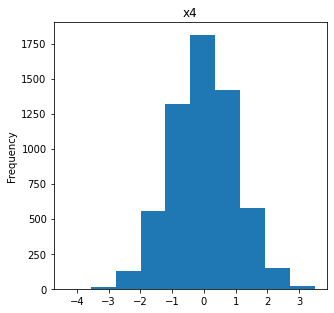

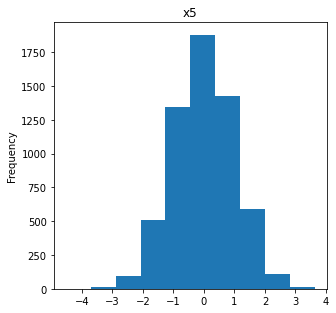

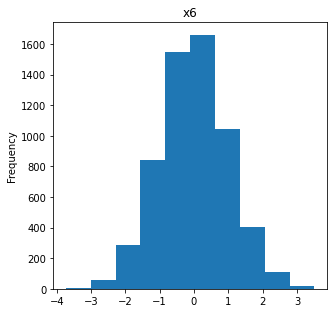

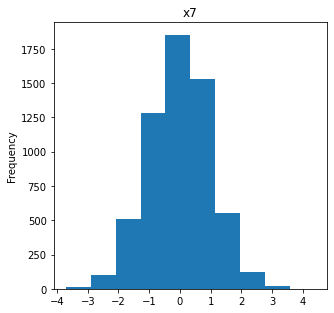

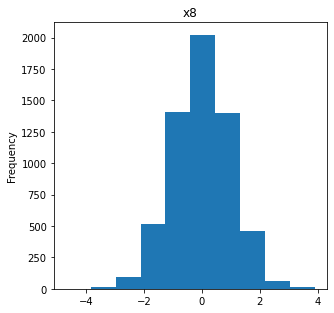

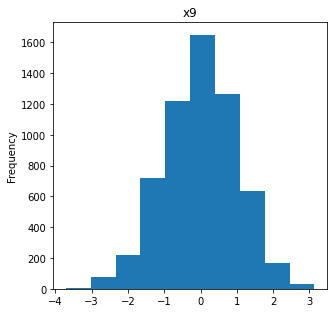

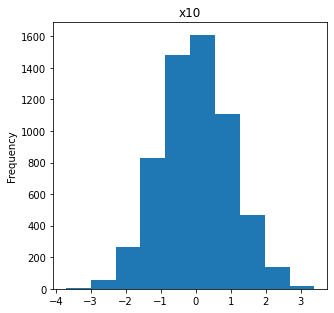

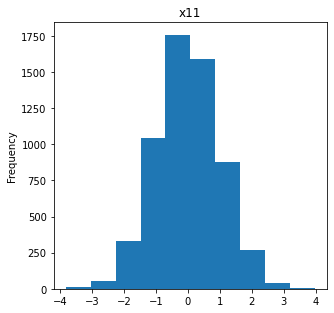

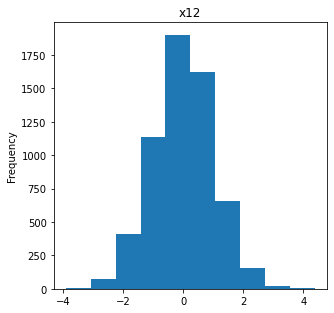

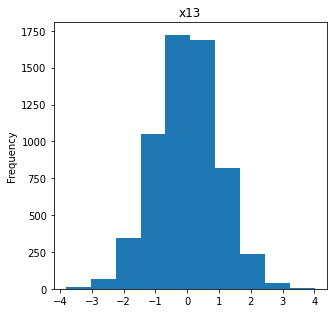

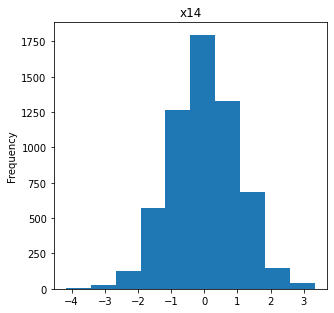

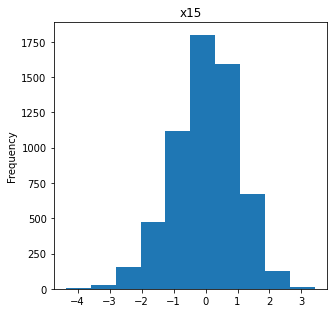

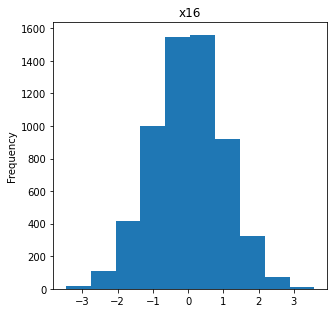

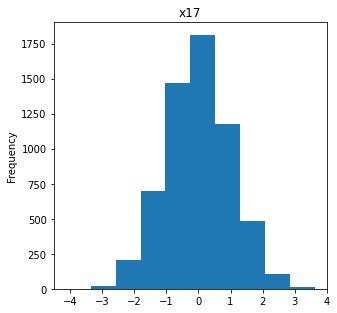

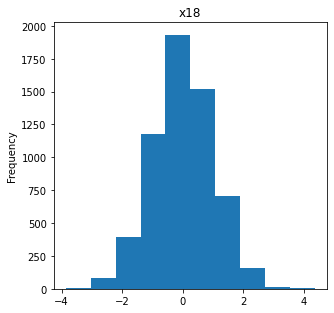

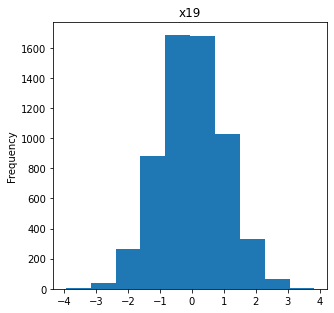

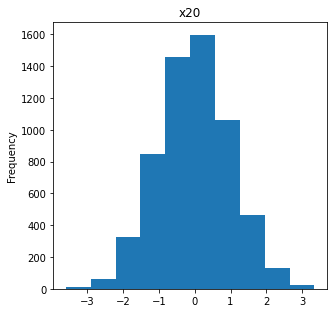

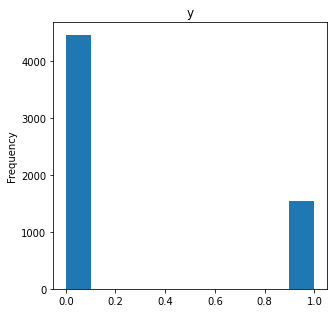

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype

for column in scaled_features:
    plt.figure(column, figsize = (4.9,4.9))
    plt.title(column)
    if is_numeric_dtype(scaled_features[column]):
        scaled_features[column].plot(kind = 'hist')
    elif is_string_dtype(df[column]):
 # show only the TOP 10 value count in each categorical data
        df[column].value_counts()[:10].plot(kind = 'bar')

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR

array = scaled_features.values
X = array[:,0:20]
Y = array[:,20]

# Feature extraction
model = DecisionTreeClassifier()
rfe = RFE(model)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 10
Selected Features: [False  True  True False False  True  True  True  True  True False  True
 False  True  True False False False False False]
Feature Ranking: [10  1  1  4  8  1  1  1  1  1 11  1  2  1  1  3  6  5  9  7]


Feature selection: x2  x3  x6  x7  x8  x9  x10 x12 x14  x15

In [16]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(1,len(coefs)+1)]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 0.002 * X1 + -0.243 * X2 + -0.037 * X3 + 0.004 * X4 + -0.0 * X5 + 0.167 * X6 + 0.052 * X7 + 0.108 * X8 + -0.124 * X9 + 0.012 * X10 + 0.005 * X11 + 0.136 * X12 + 0.006 * X13 + -0.237 * X14 + -0.192 * X15 + -0.005 * X16 + 0.001 * X17 + -0.0 * X18 + -0.004 * X19 + 0.003 * X20


In [17]:
X=scaled_features[['x2','x3','x6','x7','x8','x9','x10','x12','x14','x15']].to_numpy()
Y=scaled_features['y'].to_numpy()

from sklearn.neural_network import MLPClassifier
clf_log = MLPClassifier(random_state=2, max_iter=400)
clf_log.fit(X, Y)


#Model Evaluation
print("Neural Network")
print("Training set score: %f" % clf_log.score(X, Y))

Neural Network
Training set score: 0.995155


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [18]:
scaled_features = df_test.copy()
col_names = ['x'+str(i) for i in range(1,21)]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)


scaled_features[col_names] = features
scaled_features.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,0.046451,-2.225275,-1.823140,0.652070,1.257310,-0.194679,0.304902,-0.883773,0.319061,0.141315,-2.707939,0.656691,1.323474,1.643752,0.601550,-0.971904,0.162820,-0.847057,-0.441616,-0.154150
1,0.345140,-0.134658,0.635898,-0.228871,-0.323003,1.956466,1.250985,-2.137466,0.035397,-1.859363,1.307699,-0.055403,-1.263298,-2.643305,0.096016,-0.516826,-0.201950,0.492521,0.257075,-0.235526
2,1.088266,0.361084,-0.369866,0.631303,-0.842440,0.778585,1.274220,-0.163958,-1.228706,0.608029,0.125347,0.508198,1.774571,1.868732,0.692071,-0.781325,-0.831241,-1.479062,-2.772547,-1.124720
3,1.414196,0.220860,0.445752,0.958012,0.312812,0.177372,0.570464,-1.574997,-0.395758,-0.551780,0.641981,1.781918,0.676220,0.234164,0.766046,1.216681,-1.505077,-0.209728,-0.813483,-1.402523
4,-0.700310,0.963487,0.607439,0.963337,0.630733,-0.856031,-0.053556,0.735675,0.632425,0.611477,0.549131,0.428777,0.394717,-0.016333,0.578344,-0.022697,2.803748,1.295784,0.190670,0.644819


In [19]:
scaled_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2500 non-null   float64
 1   x2      2500 non-null   float64
 2   x3      2500 non-null   float64
 3   x4      2500 non-null   float64
 4   x5      2500 non-null   float64
 5   x6      2500 non-null   float64
 6   x7      2500 non-null   float64
 7   x8      2500 non-null   float64
 8   x9      2500 non-null   float64
 9   x10     2500 non-null   float64
 10  x11     2500 non-null   float64
 11  x12     2500 non-null   float64
 12  x13     2500 non-null   float64
 13  x14     2500 non-null   float64
 14  x15     2500 non-null   float64
 15  x16     2500 non-null   float64
 16  x17     2500 non-null   float64
 17  x18     2500 non-null   float64
 18  x19     2500 non-null   float64
 19  x20     2500 non-null   float64
dtypes: float64(20)
memory usage: 390.8 KB


In [20]:
X_test=scaled_features[['x2','x3','x6','x7','x8','x9','x10','x12','x14','x15']].to_numpy()
clf_log.predict(X_test)

array([1, 1, 0, ..., 0, 1, 0])

In [21]:
predict = clf_log.predict(X_test)
fields = ['id','Expected']
df = pd.DataFrame()
id = list(range(1,2501))
df['id']=pd.Series(id)
df['Expected']=pd.Series(predict)
df.to_csv('submit.csv', index=False)
df.head()

,id,Expected
0,1,1
1,2,1
2,3,0
3,4,0
4,5,0


In [22]:
# Your work
# Must have
# 1. Cleansing data
# 2. Exploratory Data Analysis (describe insight and visualization)
# 3. Training data - Crossvalidation
# 4. Testing data

In [23]:
#